In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jatin-agrawal17/Youtube-Chrome_plugin/main/data/reddit.csv")

In [3]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [5]:
df.sample(10)['clean_comment']

,clean_comment
36770,don’ think optical ‘detects’ anything the way...
33781,quality this pic really nice
27512,that quite coup for india usually don get any ...
33606,euphoric statements our very own esteemed lord
14302,captcha daal bhai
27415,what the difference between slab exemption and...
34134,low what does reeeeeee stand for
2163,ffffffffuuuuuuuuu barkha stop interrupting you...
16139,think kerala going witness something big the ...
24551,nice see people fighting out against this kno...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
df.isnull().sum()

,0
clean_comment,100
category,0


In [8]:
df[df['clean_comment'].isnull()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [9]:
df[df['clean_comment'].isnull()]['category'].value_counts()

,count
category,
0,100


In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(350)

In [12]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [15]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [16]:
df['clean_comment'] = df['clean_comment'].str.lower()

In [17]:
df['clean_comment'] = df['clean_comment'].str.strip()

In [18]:
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [19]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.8+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains (url_pattern, regex=True)]
comments_with_urls.head()

,clean_comment,category


In [20]:
comments_with_newlines = df[df['clean_comment'].str.contains('\n')]

In [21]:
comments_with_newlines

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1
...,...,...
35128,火箭o辛基 2016 sughosh bansal mission “make india”...,-1
35230,yikes the title should blind bhakts modi hater...,1
36187,hahahahahhahahah \niska klpd hogya,0
36517,्ा् ी ाी े ो ेी ाी े।\nे ी,0


In [22]:
df['clean_comment'] = df['clean_comment'].str.replace("\n" , ' ', regex = True)

In [23]:
comments_with_newlines_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newlines_remaining

,clean_comment,category


**EDA**

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

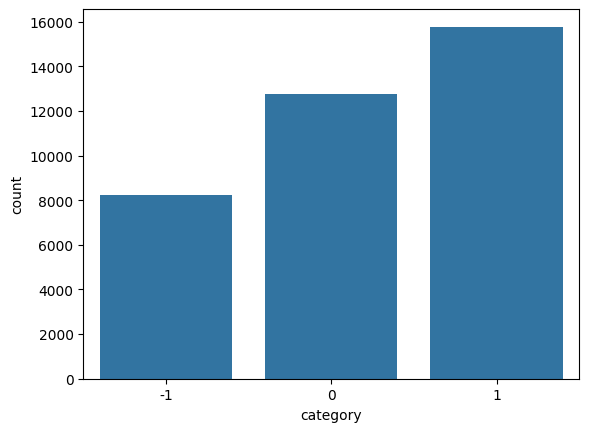

In [25]:
sns.countplot(data = df , x = df['category'])

In [26]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,42.86
0,34.71
-1,22.42


In [28]:
df['word_count'] = df['clean_comment'].apply(lambda x : len(x.split()))

In [29]:
df.sample(5)

,clean_comment,category,word_count
5448,per chi aveva chiesto qualche intro sul machin...,0,120
30102,lolol india attacking minorities will get you ...,1,9
15663,have you done anything for the country before ...,1,84
13792,motorcycle bicycle are both means transportati...,-1,23
18805,other option,-1,2


In [30]:
df['word_count'].describe()

,word_count
count,36793.000000
mean,29.667464
std,56.790738
min,1.000000
25%,6.000000
50%,13.000000
75%,30.000000
max,1307.000000


<Axes: xlabel='word_count', ylabel='Density'>

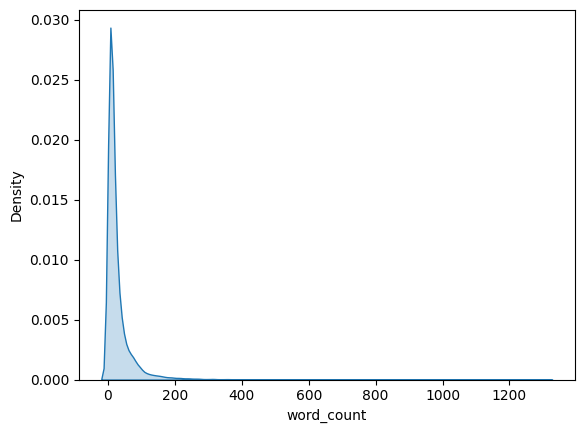

In [33]:
sns.kdeplot(df['word_count'] , fill=True)

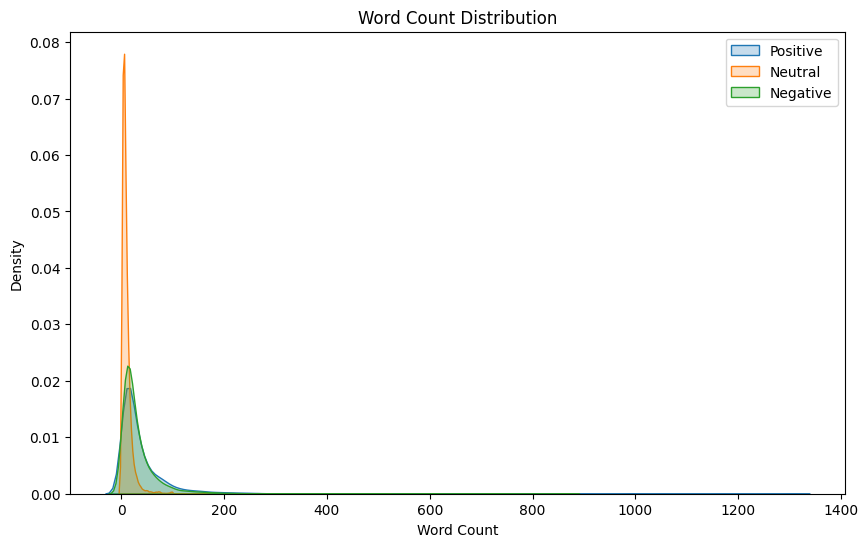

In [38]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category'] == 1]['word_count'] , label='Positive' , fill=True)
sns.kdeplot(df[df['category'] == 0]['word_count'] , label='Neutral' , fill=True)
sns.kdeplot(df[df['category'] == -1]['word_count'] , label='Negative' , fill=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.legend()
plt.show()

<Axes: ylabel='word_count'>

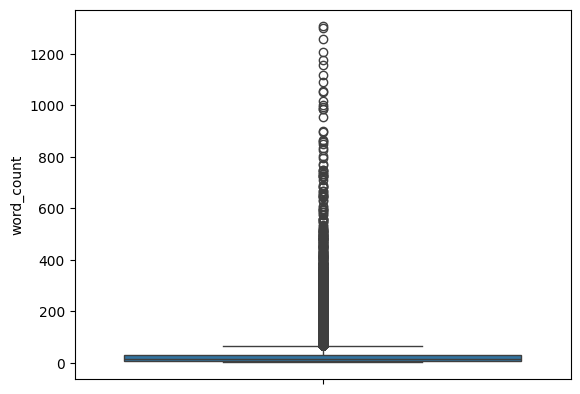

In [39]:
sns.boxplot(df['word_count'])

/tmp/ipython-input-3121767349.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


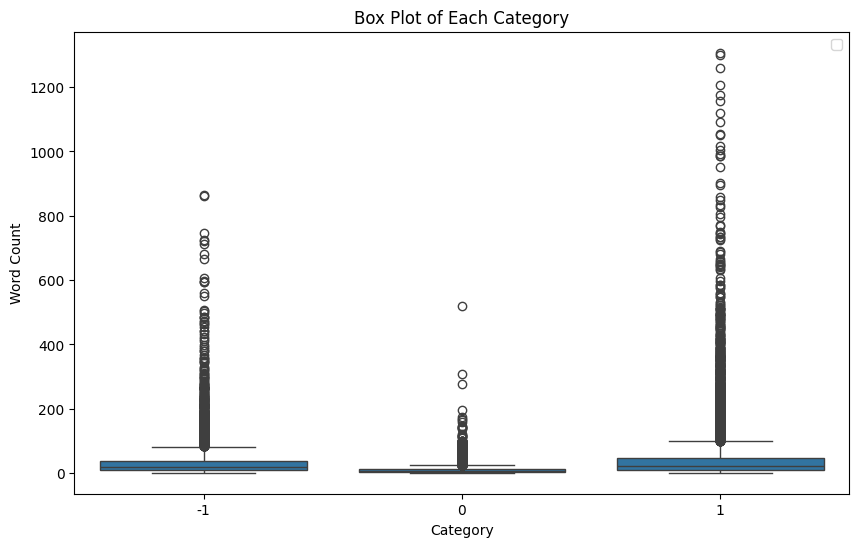

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'category', y = 'word_count')
plt.title("Box Plot of Each Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.legend()
plt.show()

/tmp/ipython-input-3915387484.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


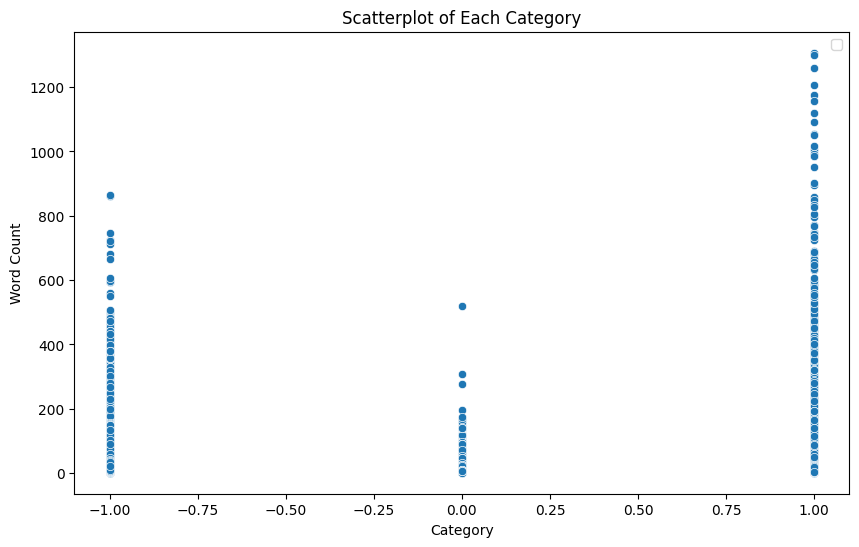

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'category', y = 'word_count')
plt.title("Scatterplot of Each Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.legend()
plt.show()

/tmp/ipython-input-3137653711.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


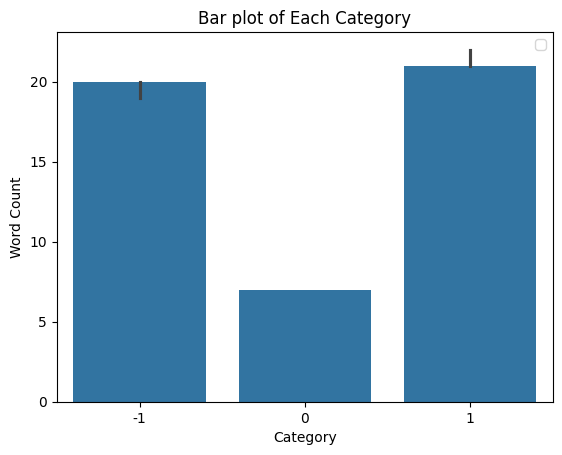

In [47]:

sns.barplot(data = df, x = 'category', y = 'word_count' , estimator='median')
plt.title("Bar plot of Each Category")
plt.xlabel("Category")
plt.ylabel("Word Count")
plt.legend()
plt.show()

In [48]:
!pip install nltk

In [49]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
5165,are you like what years old cannot you even pr...,1,43,17
6026,looks like chanakya was the closest again nda mgb,0,9,3
16592,can tamil people confirm vijay actually christ...,1,43,13
1113,this must stickied the nations interest,0,6,2
37147,thats not modi,0,3,1


<Axes: xlabel='num_stop_words', ylabel='Density'>

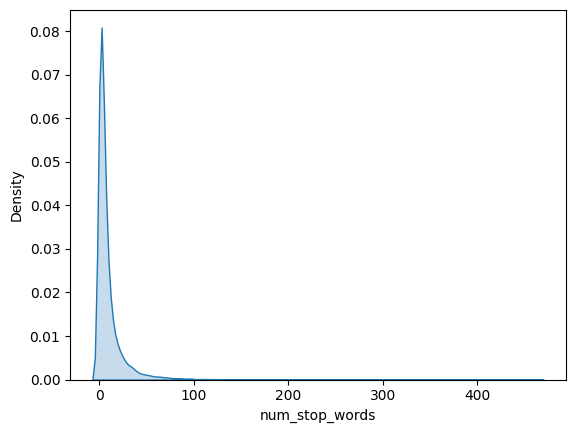

In [51]:
sns.kdeplot(df['num_stop_words'] , fill=True)

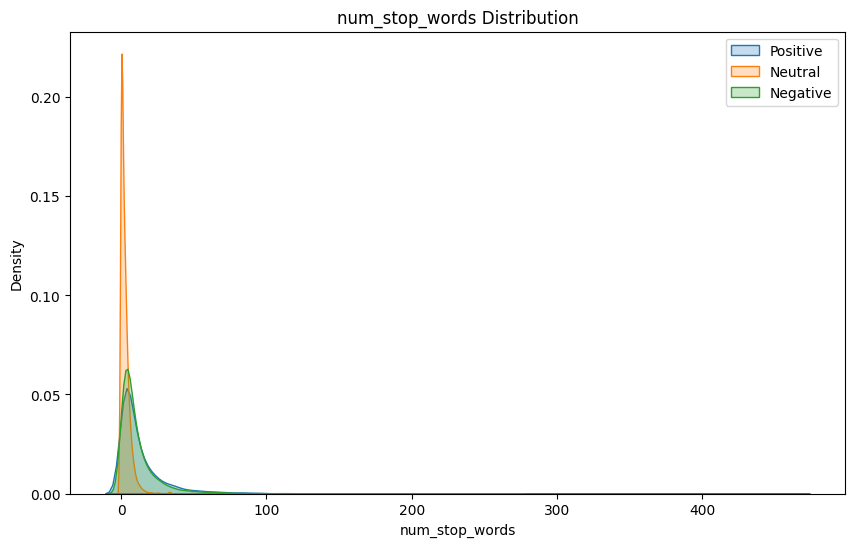

In [52]:
plt.figure(figsize=(10,6))
sns.kdeplot(df[df['category'] == 1]['num_stop_words'] , label='Positive' , fill=True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'] , label='Neutral' , fill=True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'] , label='Negative' , fill=True)
plt.title("num_stop_words Distribution")
plt.xlabel("num_stop_words")
plt.ylabel("Density")
plt.legend()
plt.show()

/tmp/ipython-input-4293753956.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


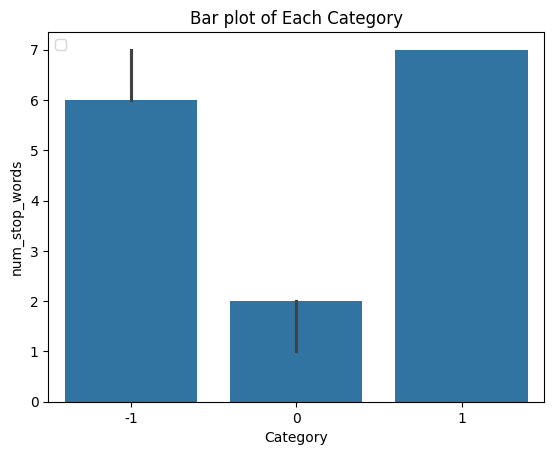

In [53]:
sns.barplot(data = df, x = 'category', y = 'num_stop_words' , estimator='median')
plt.title("Bar plot of Each Category")
plt.xlabel("Category")
plt.ylabel("num_stop_words")
plt.legend()
plt.show()

/tmp/ipython-input-2846226227.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x = 'count', y = 'stop_word' , palette='viridis')


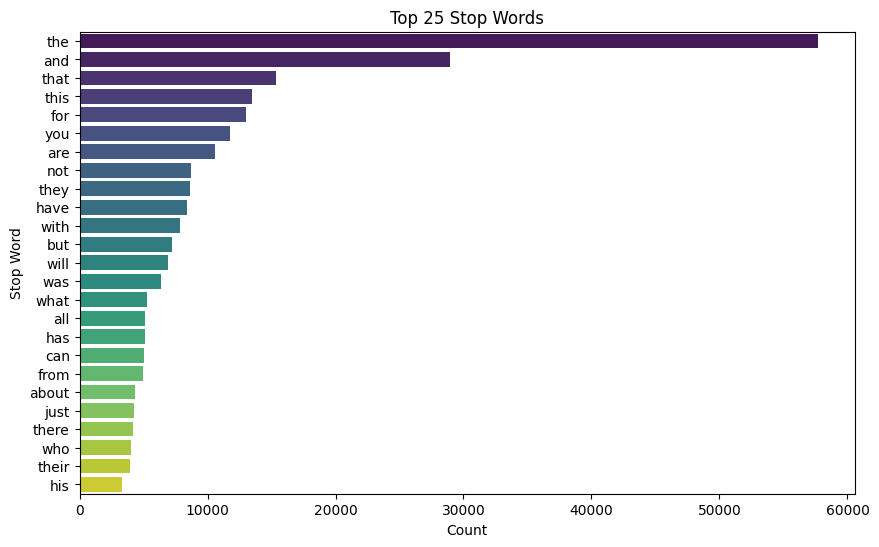

In [56]:
from collections import Counter

all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]
most_common_stop_words = Counter(all_stop_words).most_common(25)
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])
plt.figure(figsize=(10,6))
sns.barplot(data=top_25_df, x = 'count', y = 'stop_word' , palette='viridis')
plt.title("Top 25 Stop Words")
plt.xlabel("Count")
plt.ylabel("Stop Word")
plt.show()

In [57]:
df['num_char'] = df['clean_comment'].apply(len)

In [59]:
df['num_char'].describe()

,num_char
count,36793.000000
mean,181.852798
std,359.702163
min,1.000000
25%,38.000000
50%,80.000000
75%,184.000000
max,8664.000000


In [60]:
from collections import Counter
all_text = ' '.join(df['clean_comment'])
char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(), columns= ['character', 'frequency']).sort_values(by='frequency', ascending = False)
char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
...,...,...
1345,唯,1
1346,统,1
1330,段,1
1331,她,1


In [62]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '段', '她', '谁'], dtype=object)

In [63]:
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,1?;:"\'()[]{}-*])']))
df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation_chars
23597,hindu here and man all wanna have this medium ...,1,23,8,138,0
18491,seriously not tattoo done learn that she marri...,1,9,3,53,0
8030,okay won let read the news item until uninstal...,1,56,22,328,0
7869,sardesairajdeep you ask modi cheerleaders they...,0,12,4,81,0
33466,does anyone have separate video that rss train...,1,13,5,78,0


In [64]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36793.000000
mean,0.131683
std,0.938373
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,111.000000


/tmp/ipython-input-718078984.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


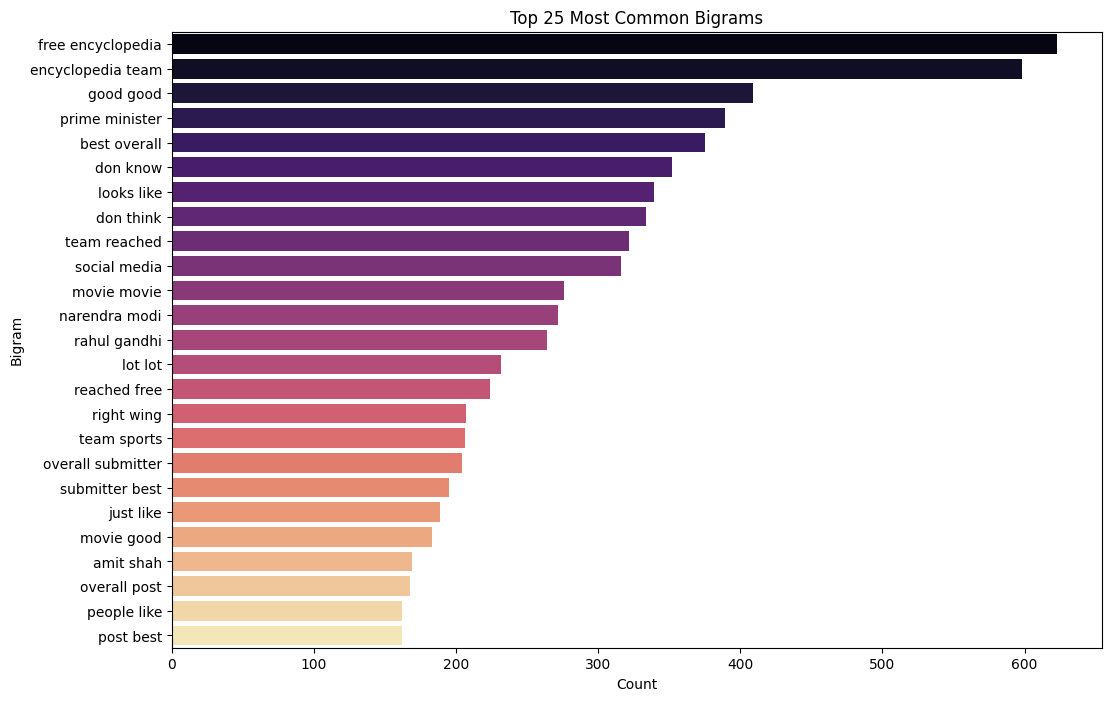

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a function to extract the top 25 bigrams
def get_top_ngrams (corpus, n=None):
  vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words [0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted (words_freq, key=lambda x: x[1], reverse=True)
  return words_freq[:n]

top_25_bigrams = get_top_ngrams (df['clean_comment'], 25)
# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])
# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

/tmp/ipython-input-3518922203.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='magma')


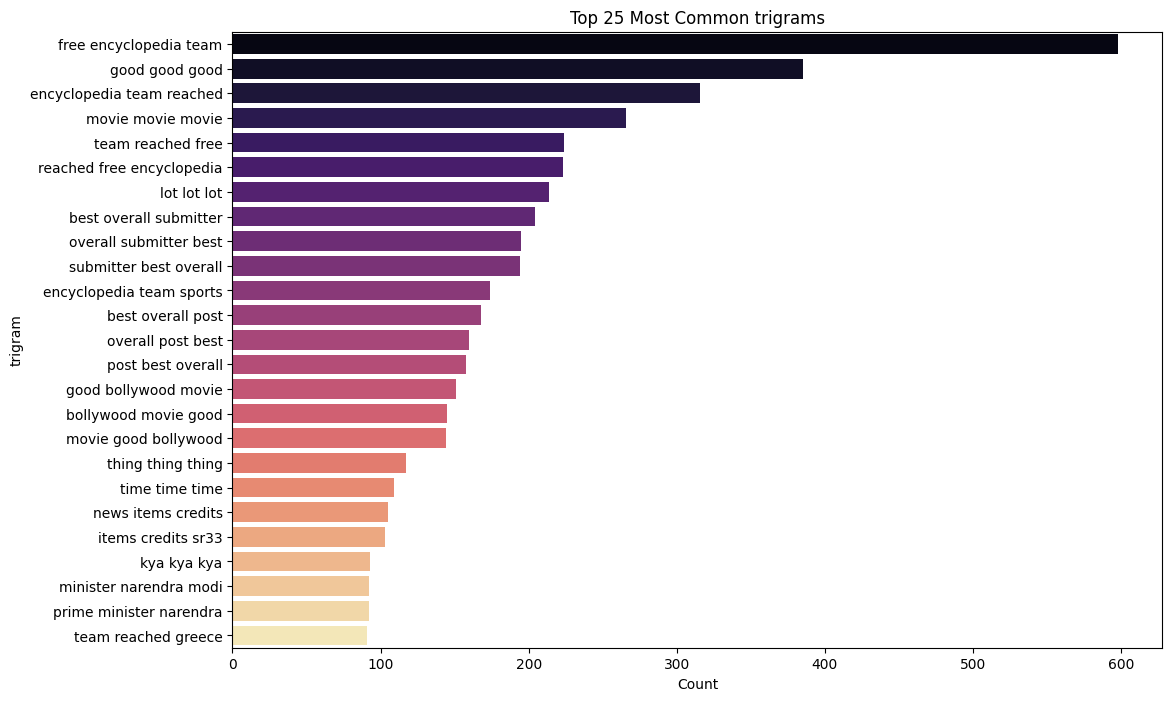

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
# Create a function to extract the top 25 bigrams
def get_top_ngrams (corpus, n=None):
  vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word, sum_words [0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted (words_freq, key=lambda x: x[1], reverse=True)
  return words_freq[:n]

top_25_trigrams = get_top_ngrams (df['clean_comment'], 25)
# Convert the bigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])
# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='magma')
plt.title('Top 25 Most Common trigrams')
plt.xlabel('Count')
plt.ylabel('trigram')
plt.show()

In [69]:
import re
df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s1?,]', '', str(x)))

In [70]:
all_text = ' '.join(df['clean_comment'])
char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values (by='frequency', ascending=False)
char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [71]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [72]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))-{'not', 'but', 'however', 'no', 'yet'}
df['clean_comment'] = df ['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [73]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [74]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmetizer = WordNetLemmatizer()
df['clean_comment'] = df['clean_comment'].apply( lambda x: ' '.join([lemmetizer.lemmatize(word) for word in x.split()]))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,num_char,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


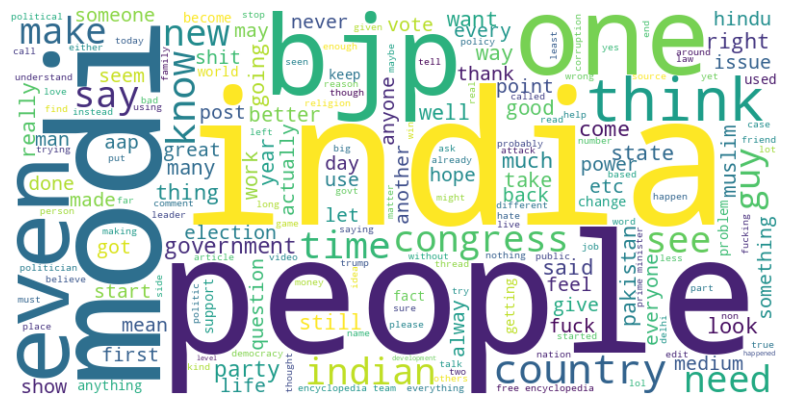

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_word_cloud(text):
  wordcloud =  WordCloud (width=800, height=400, background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
plot_word_cloud(df['clean_comment'])

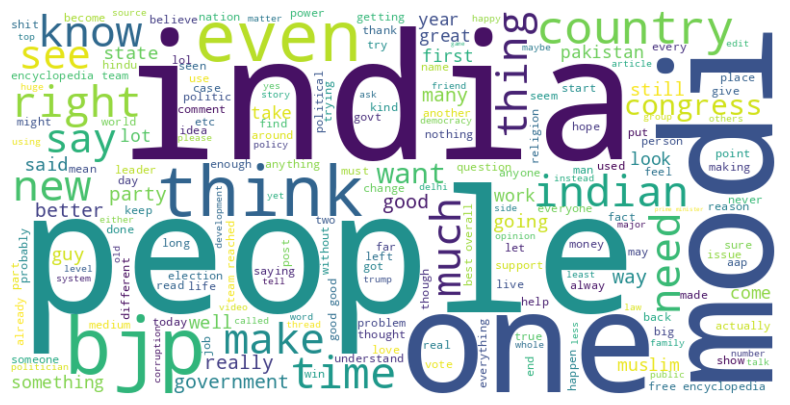

In [81]:
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

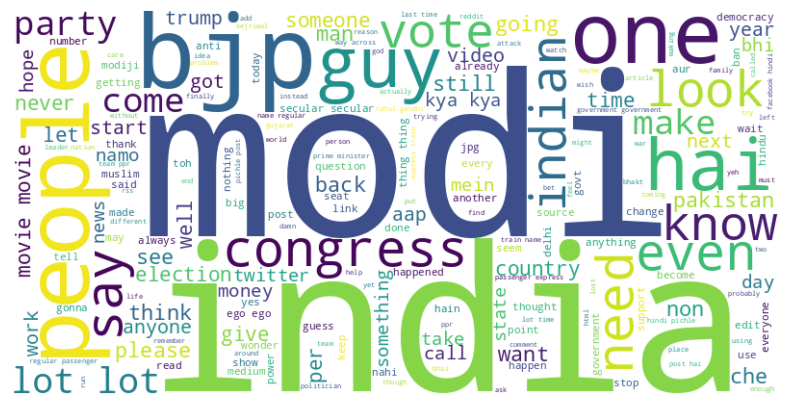

In [82]:
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

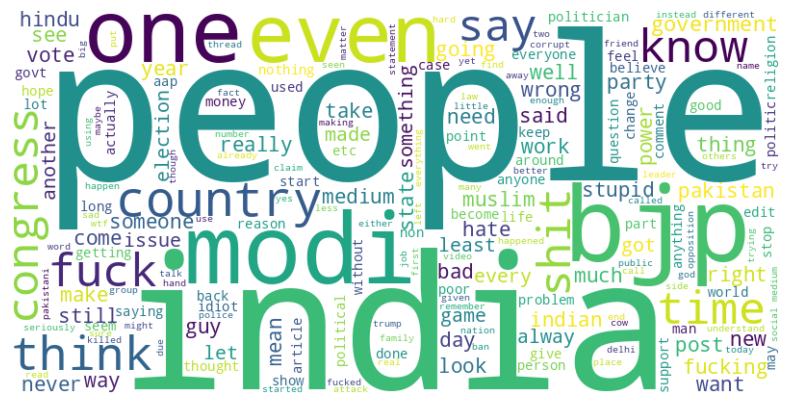

In [83]:
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

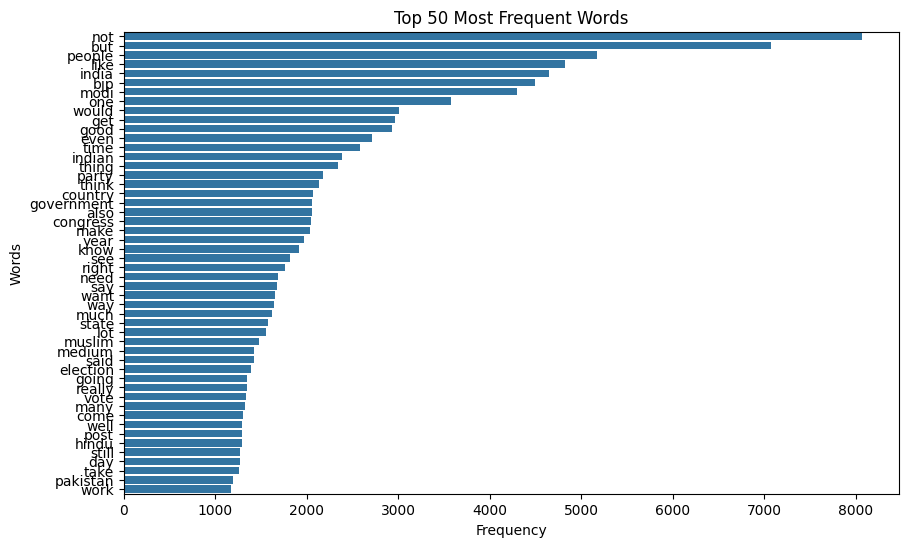

In [84]:
def plot_top_n_words (df, n=20):

  words = ''.join(df['clean_comment']).split()
  counter = Counter(words)
  most_common_words = counter.most_common(n)

  words, counts = zip(*most_common_words)

  plt.figure(figsize=(10,6))
  sns.barplot(x=list(counts), y=list(words))
  plt.title(f'Top {n} Most Frequent Words')
  plt.xlabel('Frequency')
  plt.ylabel('Words')
  plt.show()

plot_top_n_words (df, n=50)

In [88]:
def plot_top_n_words_by_category(df, n=20, start=0):
    word_category_counts = {}

    # Count words per sentiment category
    for _, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1: 0, 0: 0, 1: 0}

            word_category_counts[word][category] += 1

    # Total count of each word
    total_word_counts = {
        word: sum(counts.values())
        for word, counts in word_category_counts.items()
    }

    # Select top N words
    most_common_words = sorted(
        total_word_counts.items(),
        key=lambda x: x[1],
        reverse=True
    )[start:start + n]

    top_words = [word for word, _ in most_common_words]

    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts  = [word_category_counts[word][0]  for word in top_words]
    positive_counts = [word_category_counts[word][1]  for word in top_words]

    # Plot stacked horizontal bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    plt.barh(top_words, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(
        top_words,
        neutral_counts,
        left=negative_counts,
        color='gray',
        label='Neutral (0)',
        height=bar_width
    )
    plt.barh(
        top_words,
        positive_counts,
        left=[i + j for i, j in zip(negative_counts, neutral_counts)],
        color='green',
        label='Positive (1)',
        height=bar_width
    )

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()
    plt.show()


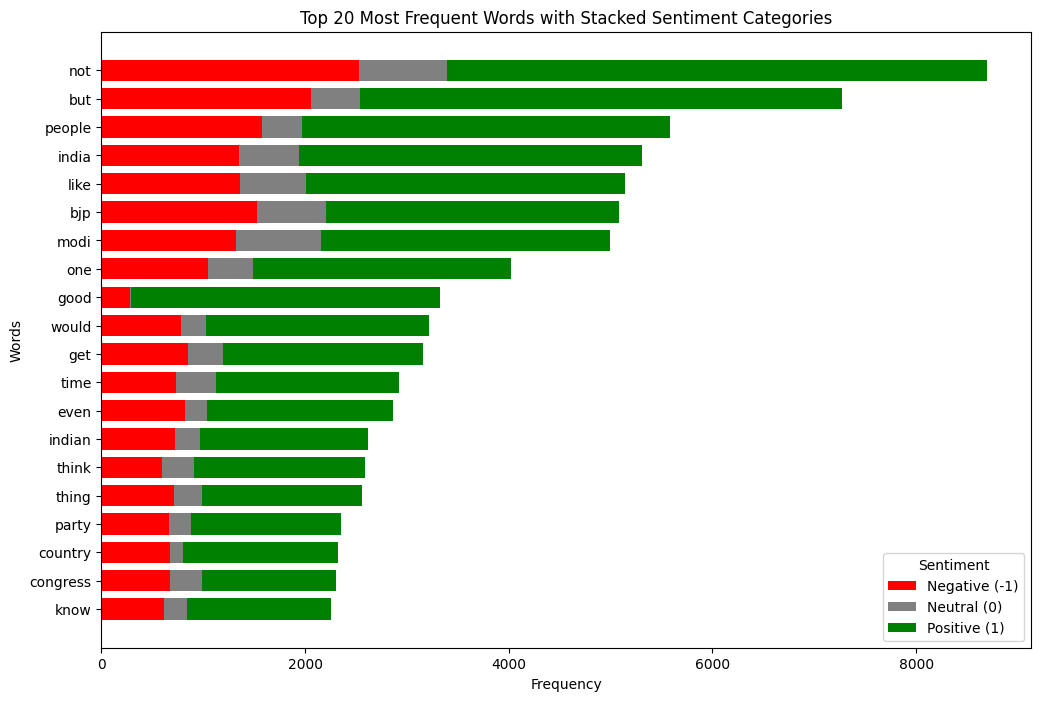

In [89]:
plot_top_n_words_by_category(df, n=20)